In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [67]:
test_df=pd.read_csv("/content/test_lAUu6dG.csv")
train_df=pd.read_csv("/content/train_ctrUa4K.csv")

#####EDA

In [68]:
test_df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
5,LP001054,Male,Yes,0,Not Graduate,Yes,2165,3422,152.0,360.0,1.0,Urban
6,LP001055,Female,No,1,Not Graduate,No,2226,0,59.0,360.0,1.0,Semiurban
7,LP001056,Male,Yes,2,Not Graduate,No,3881,0,147.0,360.0,0.0,Rural
8,LP001059,Male,Yes,2,Graduate,NaN,13633,0,280.0,240.0,1.0,Urban
9,LP001067,Male,No,0,Not Graduate,No,2400,2400,123.0,360.0,1.0,Semiurban


In [69]:
train_df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [70]:
test_df.shape


(367, 12)

In [71]:
train_df.shape

(614, 13)

In [72]:
print("Train-",train_df.columns)
print("Test-",test_df.columns)

Train- Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')
Test- Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')


In [73]:
test_df.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [74]:
train_df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [75]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [76]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [77]:
test_df.nunique()

Loan_ID              367
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      314
CoapplicantIncome    194
LoanAmount           144
Loan_Amount_Term      12
Credit_History         2
Property_Area          3
dtype: int64

In [78]:
train_df.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [79]:
test_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [80]:
train_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


### Taking unique values in the object type features and excluding the Loan_ID which is an object feature

In [81]:
test_obj_cols = test_df.select_dtypes(include=['object']).drop(['Loan_ID'], axis=1).columns

In [82]:
test_obj_cols

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area'],
      dtype='object')

In [83]:
for col in test_obj_cols:
    # Get the unique values for the column
    test_unique_vals = test_df[col].unique()
    # Print the column name and unique values
    print(col + ": " + str(test_unique_vals))

Gender: ['Male' 'Female' nan]
Married: ['Yes' 'No']
Dependents: ['0' '1' '2' '3+' nan]
Education: ['Graduate' 'Not Graduate']
Self_Employed: ['No' 'Yes' nan]
Property_Area: ['Urban' 'Semiurban' 'Rural']


In [84]:
train_obj_cols = train_df.select_dtypes(include=['object']).drop(['Loan_ID'], axis=1).columns

In [85]:
train_obj_cols

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area', 'Loan_Status'],
      dtype='object')

In [86]:
for col in train_obj_cols:
    # Get the unique values for the column
    train_unique_vals = train_df[col].unique()
    # Print the column name and unique values
    print(col + ": " + str(train_unique_vals))

Gender: ['Male' 'Female' nan]
Married: ['No' 'Yes' nan]
Dependents: ['0' '1' '2' '3+' nan]
Education: ['Graduate' 'Not Graduate']
Self_Employed: ['No' 'Yes' nan]
Property_Area: ['Urban' 'Rural' 'Semiurban']
Loan_Status: ['Y' 'N']


In [87]:
test_df['Loan_Amount_Term'].unique()

array([360., 240., 180.,  nan,  60., 480.,  84.,  12., 300., 350.,  36.,
       120.,   6.])

In [88]:
train_df['Loan_Amount_Term'].unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

In [89]:
test_df['Credit_History'].unique()

array([ 1., nan,  0.])

In [90]:
train_df['Credit_History'].unique()

array([ 1.,  0., nan])

In [91]:
train_df.drop(['Loan_ID'], axis=1, inplace=True)
test_df.drop(['Loan_ID'], axis=1, inplace=True)

In [94]:
test_features=test_df.columns
test_features


Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

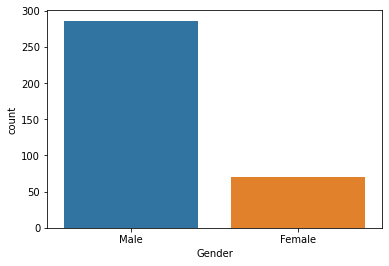

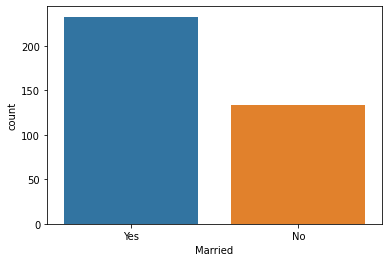

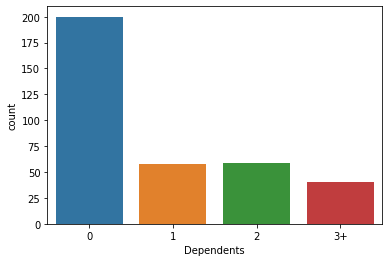

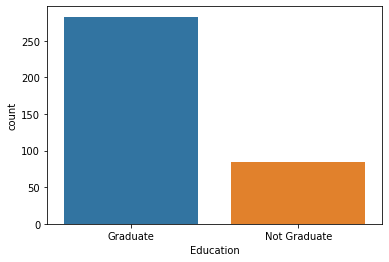

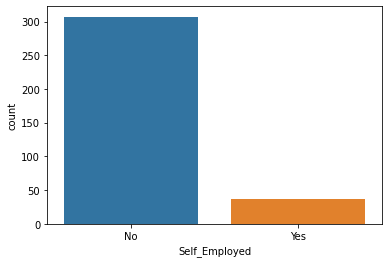

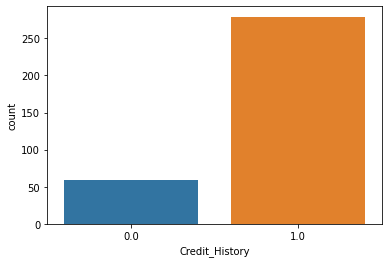

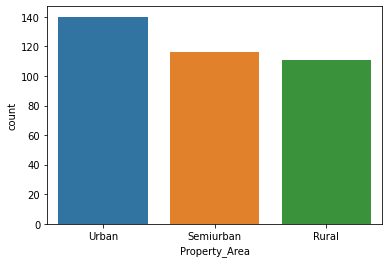

In [95]:
test_cat_cols = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area']

for col in test_cat_cols:
    sns.countplot(x=test_df[col])
    plt.show()

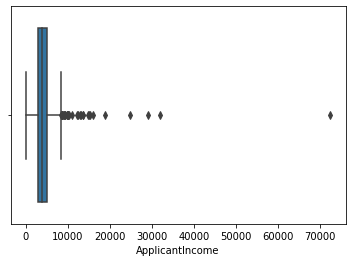

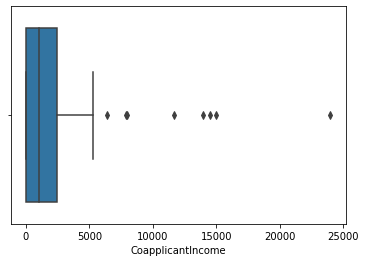

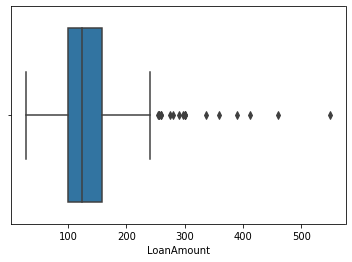

In [96]:
sns.boxplot(x=test_df['ApplicantIncome'])
plt.show()
sns.boxplot(x=test_df['CoapplicantIncome'])
plt.show()
sns.boxplot(x=test_df['LoanAmount'])
plt.show()

In [97]:
train_features=train_df.columns
train_features

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

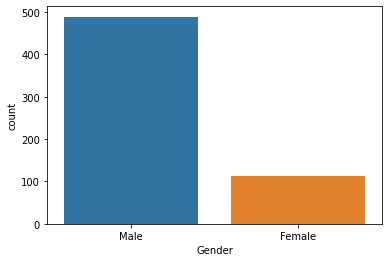

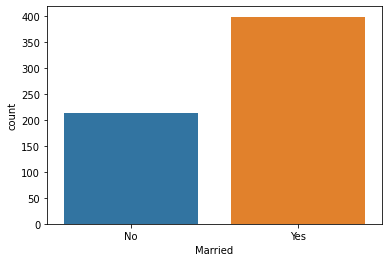

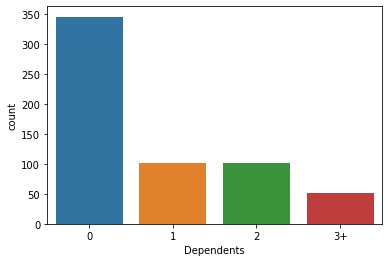

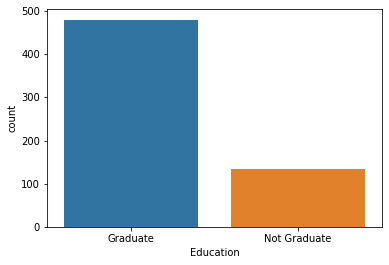

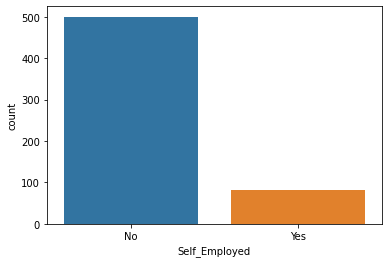

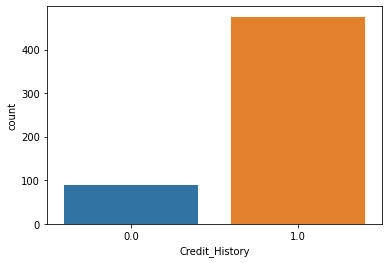

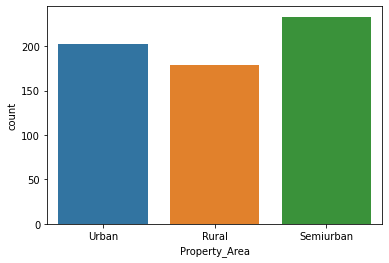

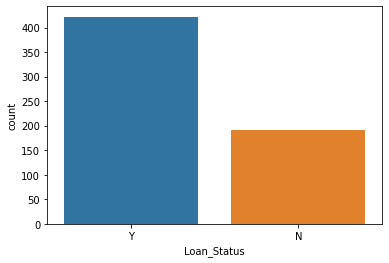

In [98]:
train_cat_cols = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area','Loan_Status']
for col in train_cat_cols:
    sns.countplot(x=train_df[col])
    plt.show()

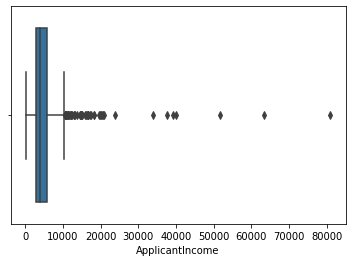

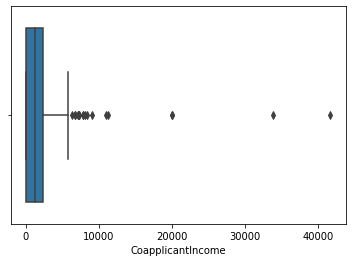

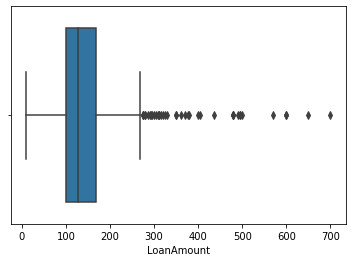

In [99]:
sns.boxplot(x=train_df['ApplicantIncome'])
plt.show()
sns.boxplot(x=train_df['CoapplicantIncome'])
plt.show()
sns.boxplot(x=train_df['LoanAmount'])
plt.show()

## **Pre-processing**

In [100]:
# Impute missing values with mean or mode for numerical and categorical variables respectively
test_df['Gender'].fillna(test_df['Gender'].mode()[0], inplace=True)
test_df['Married'].fillna(test_df['Married'].mode()[0], inplace=True)
test_df['Dependents'].fillna(test_df['Dependents'].mode()[0], inplace=True)
test_df['Self_Employed'].fillna(test_df['Self_Employed'].mode()[0], inplace=True)
test_df['LoanAmount'].fillna(test_df['LoanAmount'].median(), inplace=True)
test_df['Loan_Amount_Term'].fillna(test_df['Loan_Amount_Term'].mode()[0], inplace=True)
test_df['Credit_History'].fillna(test_df['Credit_History'].mode()[0], inplace=True)

In [101]:
# Impute missing values with mean or mode for numerical and categorical variables respectively
train_df['Gender'].fillna(train_df['Gender'].mode()[0], inplace=True)
train_df['Married'].fillna(train_df['Married'].mode()[0], inplace=True)
train_df['Dependents'].fillna(train_df['Dependents'].mode()[0], inplace=True)
train_df['Self_Employed'].fillna(train_df['Self_Employed'].mode()[0], inplace=True)
train_df['LoanAmount'].fillna(train_df['LoanAmount'].median(), inplace=True)
train_df['Loan_Amount_Term'].fillna(train_df['Loan_Amount_Term'].mode()[0], inplace=True)
train_df['Credit_History'].fillna(train_df['Credit_History'].mode()[0], inplace=True)

In [102]:
from sklearn.preprocessing import LabelEncoder

test_le = LabelEncoder()

test_df['Gender'] = le.fit_transform(test_df['Gender'])
test_df['Married'] = le.fit_transform(test_df['Married'])
test_df['Dependents'] = le.fit_transform(test_df['Dependents'])
test_df['Education'] = le.fit_transform(test_df['Education'])
test_df['Self_Employed'] = le.fit_transform(test_df['Self_Employed'])
test_df['Property_Area'] = le.fit_transform(test_df['Property_Area'])

In [103]:
train_le = LabelEncoder()

train_df['Gender'] = le.fit_transform(train_df['Gender'])
train_df['Married'] = le.fit_transform(train_df['Married'])
train_df['Dependents'] = le.fit_transform(train_df['Dependents'])
train_df['Education'] = le.fit_transform(train_df['Education'])
train_df['Self_Employed'] = le.fit_transform(train_df['Self_Employed'])
train_df['Property_Area'] = le.fit_transform(train_df['Property_Area'])

## **Modelling**


In [155]:
X= train_df.drop('Loan_Status', axis=1)
y= train_df['Loan_Status']

In [156]:
from sklearn.model_selection import train_test_split,GridSearchCV
X_train, X_test, y_train,y_test= train_test_split(X,y,test_size= 0.3, stratify=y, random_state=42)

In [158]:
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold, cross_val_score

In [159]:
value= [LogisticRegression(), RandomForestClassifier(), KNeighborsClassifier(),GradientBoostingClassifier()]

key= ['LogisticRegression', 'RandomForsetClassifier',   'KNeighborsClassifier','GradientBoostingClassifier']

models= dict(zip(key,value))
accuracy_scores=[]
for key,value in models.items():
    value.fit(X_train,y_train)
    y_pred= value.predict(X_test)
    accuracy= accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    print(key)
    print(accuracy)

LogisticRegression
0.8540540540540541
RandomForsetClassifier
0.8108108108108109
KNeighborsClassifier
0.7567567567567568
GradientBoostingClassifier
0.7837837837837838


In [161]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [163]:
y_pred=lr.predict(test_df)

In [164]:
sample_submission=pd.read_csv('/content/sample_submission_49d68Cx.csv')

In [165]:
sample_submission.head()

,Loan_ID,Loan_Status
0,LP001015,N
1,LP001022,N
2,LP001031,N
3,LP001035,N
4,LP001051,N


In [166]:
sample_submission['Loan_Status']=y_pred

In [167]:
status={1: 'Y', 0: 'N'}
sample_submission['Loan_Status']=sample_submission['Loan_Status'].map(status)
sample_submission.head()

,Loan_ID,Loan_Status
0,LP001015,NaN
1,LP001022,NaN
2,LP001031,NaN
3,LP001035,NaN
4,LP001051,NaN


In [168]:
sample_submission.to_csv('SACHIN_SJ.csv')

In [173]:
data=pd.read_csv('SACHIN_SJ.csv')
data.head(10)

,Unnamed: 0,Loan_ID,Loan_Status
0,0,LP001015,NaN
1,1,LP001022,NaN
2,2,LP001031,NaN
3,3,LP001035,NaN
4,4,LP001051,NaN
5,5,LP001054,NaN
6,6,LP001055,NaN
7,7,LP001056,NaN
8,8,LP001059,NaN
9,9,LP001067,NaN


In [170]:
from sklearn.model_selection import GridSearchCV
paramgrid = {'max_depth': list(range(1, 20, 2)), 
                    'n_estimators': list(range(1, 200, 20))}
grid_search=GridSearchCV(RandomForestClassifier(random_state=1),paramgrid)
from sklearn.model_selection import train_test_split
# Fit the grid search model 
grid_search.fit(X_train,y_train)
GridSearchCV(cv=None, error_score='raise',       
        estimator=RandomForestClassifier(bootstrap=True, class_weight=None, 
                criterion='gini', max_depth=None, max_features='auto', 
                max_leaf_nodes=None, min_impurity_decrease=0.0,  
min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1, oob_score=False, 
random_state=1, verbose=0, warm_start=False),       
param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
     'n_estimators': [1, 21, 41, 61, 81, 101, 121, 141, 161, 181]},       

pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',scoring=None, verbose=0)

GridSearchCV(error_score='raise',
             estimator=RandomForestClassifier(max_features='auto',
                                              n_estimators=10, n_jobs=1,
                                              random_state=1),
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
                         'n_estimators': [1, 21, 41, 61, 81, 101, 121, 141, 161,
                                          181]},
             return_train_score='warn')